In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-dst-scoring/sample_submission.csv
/kaggle/input/sf-dst-scoring/train.csv
/kaggle/input/sf-dst-scoring/test.csv


In [87]:
RANDOM_SEED = 31
!pip freeze > requirements.txt
# заморозили настройки :) и загрузим данные
import numpy as np
import pandas as pd
DATA_DIR = '/kaggle/input/sf-dst-scoring/'
df_train = pd.read_csv(DATA_DIR+'/train.csv')
df_test = pd.read_csv(DATA_DIR+'test.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')


In [88]:
df_train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [89]:
df_test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [6]:
# посмотрим на данные
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [8]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB


In [9]:
sample_submission.head()

,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640


In [90]:
# объединим тренировочный и тестовый датасеты, добавив в тестовый клолнку default и 
# колонку чтобы отличать два датасета друг от друга

df_train['train'] = 1 
df_test['train'] = 0 
df_test['default'] = 0
df = df_test.append(df_train, sort = False).reset_index(drop = True)

In [11]:
# посмотрим что получилось:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

478
['GRD' 'SCH' 'UGR' 'PGR' nan 'ACD']


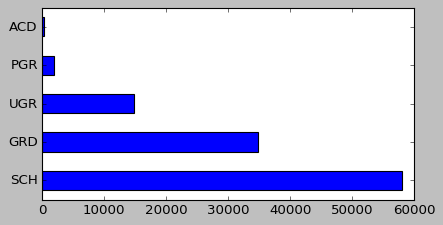

In [91]:
# есть пропуски у education
import matplotlib.pyplot as plt
print(df.education.isnull().sum())
print(df.education.unique())
df.education.value_counts().plot.barh()
plt.show()

In [92]:
# запимним кто не указал этот признак:
df['education_not_set'] = pd.isna(df['education'])

In [93]:
# и надо как то заполнить пропуски...их доля:
print(df['education'].isnull().value_counts()[1]/df['education'].isnull().value_counts()[0]*100,'%')

0.43585301358621314 %


In [94]:
# можно либо все пропуски заполнить SCH либо например оценить доход и попробовать угадать образование:
income_mean = round(df.groupby(['education']).income.mean())
income_mean.sort_values(inplace=True)
display(income_mean)

education
SCH    32033.0
UGR    39010.0
GRD    54315.0
PGR    79753.0
ACD    85949.0
Name: income, dtype: float64

In [95]:
def edu_set(row):
    if row['education'] == 'Not set':
        if row['income'] >= (85949.0 + 79753.0)/2: 
            return 'ACD'
        elif row['income'] >= (79753.0 + 54315.0)/2: 
            return 'PGR'
        elif row['income'] >= (54315.0 + 39010.0)/2: 
            return 'GRD'
        elif row['income'] >= (39010.0 + 32033.0)/2: 
            return 'UGR'
        else:
            return 'SCH'
    else:
        return row['education']
df['education'] = df['education'].fillna('Not set')
df['education'] = df.apply(edu_set, axis=1)

0
['GRD' 'SCH' 'UGR' 'PGR' 'ACD']


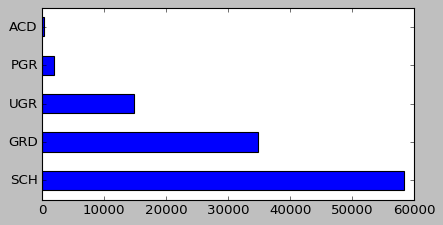

SCH    58282
GRD    34829
UGR    14813
PGR     1888
ACD      336
Name: education, dtype: int64

In [96]:
# готово
print(df.education.isnull().sum())
print(df.education.unique())
df.education.value_counts().plot.barh()
plt.show()
df.education.value_counts()

In [98]:
# можно разделить теперь признаки по категориям
df.nunique()
date_cols = ['app_date']
bin_cols =['sex', 'car', 'car_type', 'foreign_passport', 'good_work', 'education_not_set'] 
cat_cols =['education', 'region_rating', 'home_address','work_address', 'sna', 'first_time']
num_cols = ['age', 'bki_request_cnt', 'decline_app_cnt', 'income', 'score_bki']

# избавимся от строк
import datetime as dt
df['app_date'] = df['app_date'].apply(lambda x: dt.datetime.strptime(x, '%d%b%Y').toordinal())

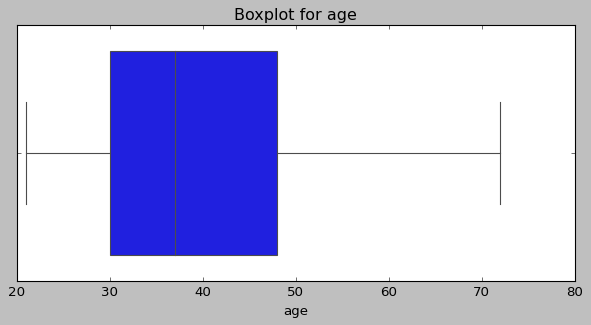

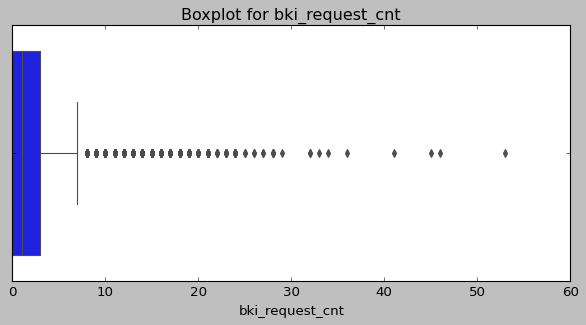

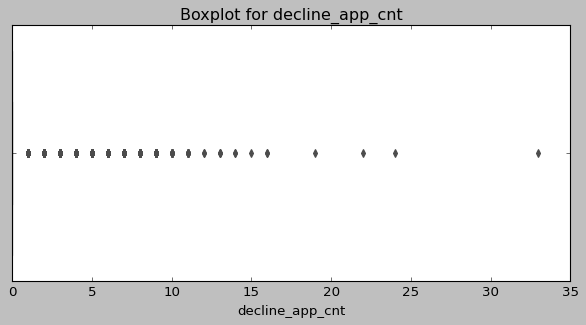

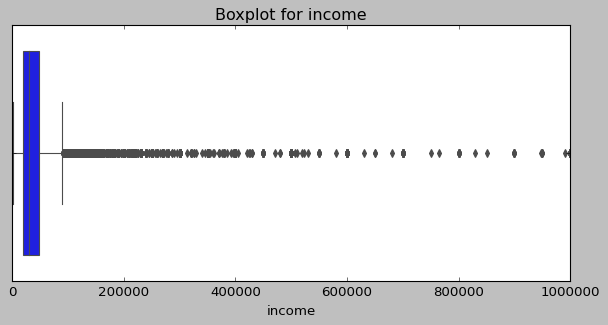

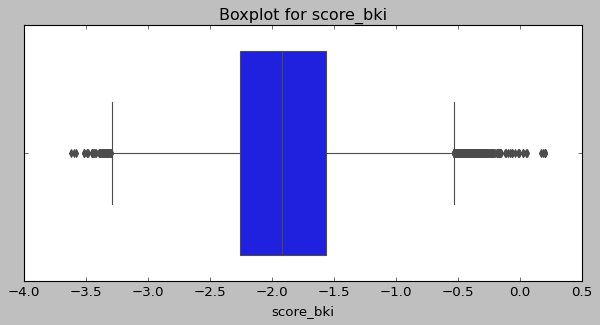

In [99]:
# посмотрим на признаки подподробнее, но выберем только учебный сет
import seaborn as sns
plt.style.use('classic')
def get_boxplot(column, df):
    fig, ax = plt.subplots(figsize = (9, 4))
    sns.boxplot(x=column, data=df, ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()
train_df = df.query('train == 1')
test_df = df.query('train == 0')
for column in num_cols:
    get_boxplot(column,train_df)

IQR =  18.0
25% =  30.0
75% =  48.0


array([62, 59, 25, 53, 48, 27, 39, 50, 54, 29, 32, 30, 23, 37, 36, 41, 28,
       58, 26, 45, 44, 43, 56, 40, 34, 33, 67, 38, 46, 42, 35, 24, 61, 21,
       52, 55, 49, 57, 31, 64, 63, 51, 22, 65, 47, 66, 68, 60, 69, 70, 72,
       71])

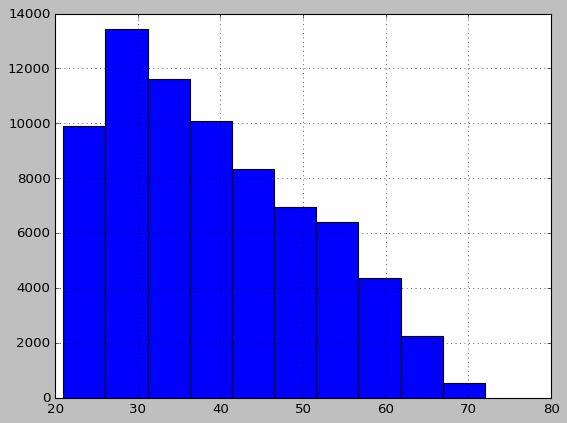

In [100]:
# посмотрим на выбросы и распеределение
column = 'age'
train_df[column].hist()
print('IQR = ', train_df[column].quantile(0.75) - train_df[column].quantile(0.25))
print('25% = ', train_df[column].quantile(0.25))
print('75% = ', train_df[column].quantile(0.75))
train_df[column].unique()

IQR =  0.0
25% =  0.0
75% =  0.0


array([ 0,  2,  1,  3,  4,  6,  5,  7,  8,  9, 13, 11, 19, 10, 22, 33, 14,
       12, 15, 24, 16])

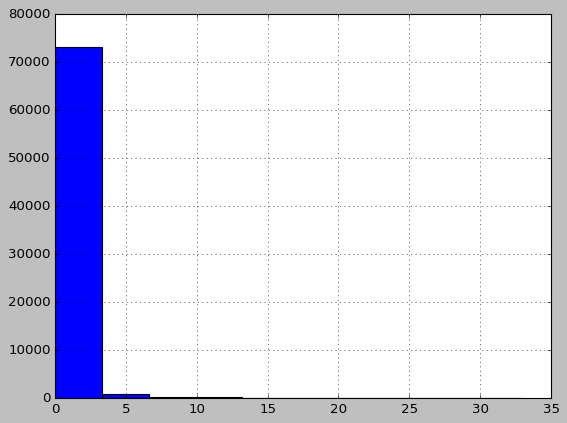

In [101]:
column = 'decline_app_cnt'
train_df[column].hist()
print('IQR = ', train_df[column].quantile(0.75) - train_df[column].quantile(0.25))
print('25% = ', train_df[column].quantile(0.25))
print('75% = ', train_df[column].quantile(0.75))
train_df[column].unique()

IQR =  3.0
25% =  0.0
75% =  3.0


array([ 1,  3,  2,  0,  4,  7,  5,  8,  6, 13, 10, 22, 12, 11, 34,  9, 16,
       14, 26, 21, 18, 24, 15, 19, 32, 17, 20, 23, 27, 36, 53, 25, 45, 33,
       28, 41, 29, 46])

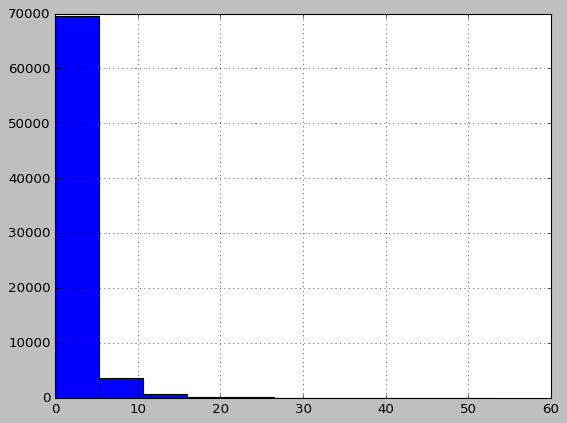

In [102]:
column = 'bki_request_cnt'
train_df[column].hist()
print('IQR = ', train_df[column].quantile(0.75) - train_df[column].quantile(0.25))
print('25% = ', train_df[column].quantile(0.25))
print('75% = ', train_df[column].quantile(0.75))
train_df[column].unique()

IQR =  28000.0
25% =  20000.0
75% =  48000.0


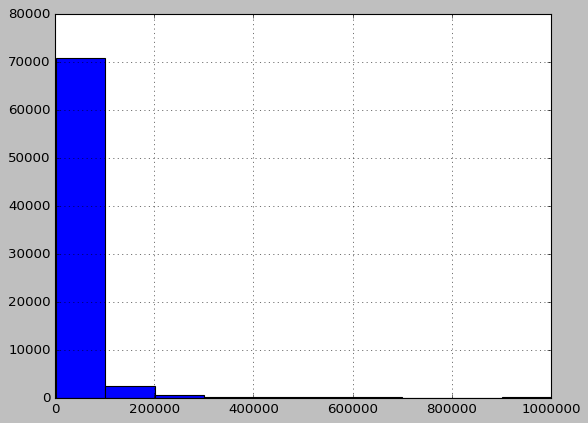

In [103]:
column = 'income'
train_df[column].hist()
print('IQR = ', train_df[column].quantile(0.75) - train_df[column].quantile(0.25))
print('25% = ', train_df[column].quantile(0.25))
print('75% = ', train_df[column].quantile(0.75))

IQR =  0.6897025750000001
25% =  -2.259533835
75% =  -1.56983126


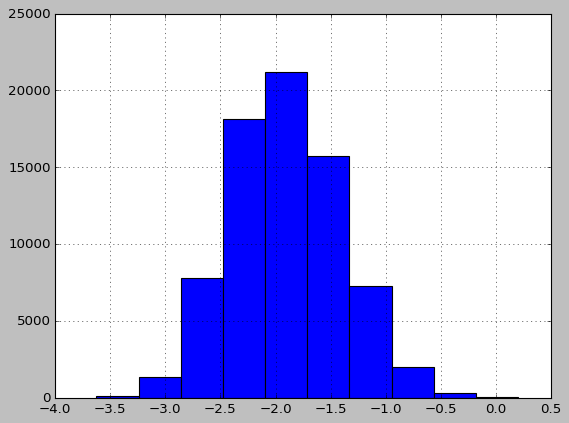

In [104]:
column = 'score_bki'
train_df[column].hist()
print('IQR = ', train_df[column].quantile(0.75) - train_df[column].quantile(0.25))
print('25% = ', train_df[column].quantile(0.25))
print('75% = ', train_df[column].quantile(0.75))

<AxesSubplot:>

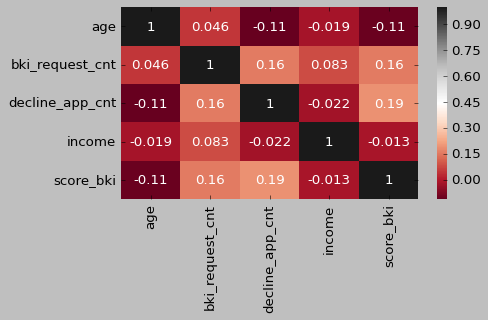

In [105]:
# посмотрим не корреляцию числовых признаков
correlation = df_train[num_cols].corr()
plt.figure(figsize=(6, 3))
sns.heatmap(correlation, annot=True, cmap='RdGy')

<AxesSubplot:>

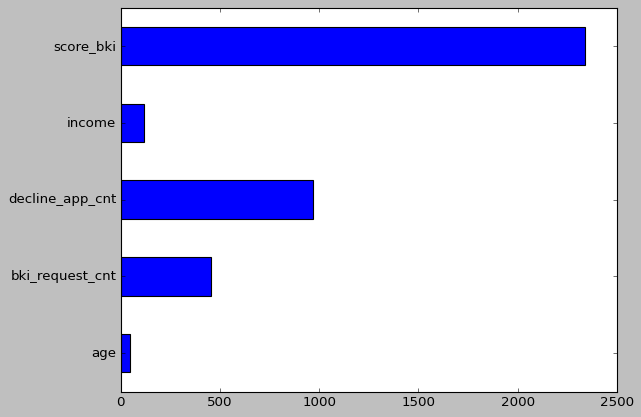

In [106]:
# что то даже нечего удалять... везде коэфициенты очень маленькие, помотрим на важность признаков:
from sklearn.feature_selection import f_classif, mutual_info_classif
f_stat = pd.Series(f_classif(train_df[num_cols], train_df['default'])[0], index = num_cols)
f_stat.plot(kind = 'barh')
# видим, что наиболее важным признаком является балл по данным из БКИ

In [107]:
# посмотрим на бинарные признаки
# вернемся к нашему общему дата сету:
df = test_df.append(train_df, sort=False).reset_index(drop=True)

In [108]:
# переведем их в 0 и 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in bin_cols:
    df[column] = le.fit_transform(df[column])


In [109]:
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,train,default,education_not_set
0,74835,735314,GRD,1,29,1,1,0,0,-2.271884,...,50,1,2,50000,1,4,0,0,0,0
1,17527,735257,SCH,0,39,0,0,5,0,-1.504999,...,50,1,2,5000,4,3,0,0,0,0
2,75683,735315,UGR,1,50,1,1,0,0,-1.691339,...,50,1,2,30000,1,3,1,0,0,0
3,26883,735267,SCH,1,56,0,0,0,0,-2.374182,...,40,1,2,17000,1,3,0,0,0,0
4,28862,735268,GRD,0,38,0,0,0,0,-2.487502,...,80,2,3,120000,1,3,0,0,0,0


In [110]:
# тоже самое проделаем и с остальными
le = LabelEncoder()
for column in cat_cols:
    df[column] = le.fit_transform(df[column])

In [111]:
train_df = df.query('train == 1').drop(['train', 'client_id'], axis=1)
test_df = df.query('train == 0').drop(['train','default'], axis=1)
# сохраним ID и потом удалим 
id_client = test_df.client_id
test_df= test_df.drop(['client_id'], axis=1)
#сгенерируем для категормальных признаков значения
train = pd.get_dummies(train_df, columns=cat_cols, dummy_na=False)

In [112]:
# взяли целевую переменную и остальное
y = train.default.values
X = train.drop(['default'], axis=1)

In [113]:
# разделим
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = RANDOM_SEED)
lr = LogisticRegression(random_state = RANDOM_SEED)
lr.fit(X_train, y_train)
y_predict_proba = lr.predict_proba(X_test)[:,1]
y_predict = lr.predict(X_test)


In [115]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score

roc_auc_score(y_test, y_predict_proba)

0.554890739317693

In [130]:
# что то не очень, в помощь приходит материал последнего модуля :)
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# преобразуем числовые в полиномиальные
poly = PolynomialFeatures(3)
X_num = poly.fit_transform(train_df[num_cols].values)
X_num_test =poly.fit_transform(test_df[num_cols].values)
rs = RobustScaler()

X_num = rs.fit_transform(train_df[num_cols].values)
X_num_test = rs.transform(test_df[num_cols].values)

X_cat = OneHotEncoder(sparse = False).fit_transform(train_df[cat_cols].values)
X_cat_test = OneHotEncoder(sparse = False).fit_transform(test_df[cat_cols].values)
# Объединяем все
X = np.hstack([X_num, train_df[bin_cols].values, X_cat])
test = np.hstack([X_num_test, test_df[bin_cols].values, X_cat_test])
y = train_df['default'].values

# Разбиваем
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RANDOM_SEED)

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C = C, penalty = penalty, tol = [1e-2], max_iter = [100])
model = LogisticRegression(random_state = RANDOM_SEED)
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])
print('Лучшее max_iter:', best_model.best_estimator_.get_params()['max_iter'])
print('Лучшее tol:', best_model.best_estimator_.get_params()['tol'])

Лучшее Penalty: l2
Лучшее C: 1.0
Лучшее max_iter: 100
Лучшее tol: 0.01


In [131]:
opt_model = LogisticRegression(penalty = 'l2', C = 1.0, max_iter = 100, solver = 'sag', class_weight = 'balanced', tol = 0.01, random_state = RANDOM_SEED)
opt_model.fit(X_train, y_train)
y_predict_proba = opt_model.predict_proba(X_test)[:,1]
y_predict = opt_model.predict(X_test)

roc_auc_score(y_test, y_predict_proba)

0.7287547781559482

In [134]:
predict_proba_submission = opt_model.predict_proba(test)[:,1]
submission = pd.DataFrame({'client_id': id_client, 
                            'default': predict_proba_submission})
submission.to_csv('submission.csv', index = False)
submission

,client_id,default
0,74835,0.211052
1,17527,0.769174
2,75683,0.334028
3,26883,0.381640
4,28862,0.133880
...,...,...
36344,83775,0.763783
36345,106254,0.133669
36346,81852,0.799394
36347,1971,0.534423


Выводы:
Первая модель дала плохой результат, данные не сбалансированы, было бы время, можно было бы попробовать использовать функцию логарифма для сглаживания, также не успел хорошо обработь выбросы у признаков. Модель с гиперпараметрами дала куда лучший результат, использовалось преобразование в полиномиальные признаки. 
Можно было бы еще привести код в более лаконичный вид, весь импорт в шапку перекинуть, сделать функции для вывода аналитки по столбцам, а не писать названия столбцов :) но время поджимает. 
